In [1]:
import sys
import os 
sys.path.append(os.path.dirname(sys.path[0]) + '/src')
import pandas as pd

df = pd.read_csv('../data/raw/sentipolc/training_set_sentipolc16.csv')

In [5]:
#df = df.drop(['idtwitter', 'opos', 'oneg', 'iro', 'lpos', 'lneg', 'top'], axis=1)

In [2]:
from models.bert_segmenter import BertSegmenter

bert_seg = BertSegmenter()
df['spans'] = df['text'].map(bert_seg.predict).values.tolist()


In [3]:
from models.bert_rep import BertRep

bert_rep = BertRep()
df['rep'] = df['spans'].map(bert_rep.predict).values.tolist()

In [4]:
df

,idtwitter,subj,opos,oneg,iro,lpos,lneg,top,text,spans,rep
0,122449983151669248,1,0,1,0,0,1,1,Intanto la partita per Via Nazionale si compli...,[Intanto la partita per Via Nazionale si compl...,"[sancire, non risposta]"
1,125485104863780865,1,0,1,0,0,1,1,"False illusioni, sgradevoli realtà Mario Monti...","[False illusioni, sgradevoli realtà Mario Mont...",[non risposta]
2,125513454315507712,1,0,1,0,0,1,1,"False illusioni, sgradevoli realtà #editoriale...","[False illusioni, sgradevoli realtà #editorial...",[non risposta]
3,125524238290522113,1,0,1,0,0,1,1,Mario Monti: Berlusconi risparmi all'Italia il...,[Mario Monti: Berlusconi risparmi all'Italia i...,[commento]
4,125527933224886272,1,0,1,0,0,1,1,Mario Monti: Berlusconi risparmi all'Italia il...,[Mario Monti: Berlusconi risparmi all'Italia i...,[commento]
...,...,...,...,...,...,...,...,...,...,...,...
7405,135136897000415233,1,1,0,1,1,1,1,"che ci frega di mario monti, noi abbiamo mario...","[che ci frega di mario monti, noi abbiamo mari...",[non risposta]
7406,143471916534087680,1,1,0,1,1,0,1,Strepitoso il titolo in prima di Libero sul go...,[Strepitoso il titolo in prima di Libero sul g...,[giudizio]
7407,153955345411219456,1,0,1,1,1,0,1,"@nataliacavalli Consolati, il governo #Monti h...","[@nataliacavalli Consolati, il governo #Monti ...","[commento, non risposta]"
7408,190835515552047104,1,1,0,1,1,1,0,"@SheisCandida beh, beate loro! Io nn possiedo ...","[@SheisCandida beh, beate loro! Io nn possiedo...","[commento, non risposta]"


In [5]:
df.to_csv('../data/processed/sentipolc/subj_rep_train.csv', index = False, header=True)

In [10]:
from datasets import hyperion_dataset

subj_df = df.loc[df['subj'] == 1]
subj_reps = subj_df.apply(lambda x: x['rep'], axis=1)
subj_reps = subj_reps.apply(pd.Series).stack().reset_index(drop=True)
subj_count = subj_reps.value_counts()
subj_size = subj_count.sum()
subj_dict = {} 
for l in hyperion_dataset.LABELS:
    try:
        subj_dict[l] = subj_count[l]
    except KeyError:
        subj_dict[l] = 0
subj_size

6633

In [11]:
from datasets import hyperion_dataset

obj_df = df.loc[df['subj'] == 0]
obj_reps = obj_df.apply(lambda x: x['rep'], axis=1)
obj_reps = obj_reps.apply(pd.Series).stack().reset_index(drop=True)
obj_count = obj_reps.value_counts()
obj_size = obj_count.sum()
obj_dict = {} 
for l in hyperion_dataset.LABELS:
    try:
        obj_dict[l] = obj_count[l]
    except KeyError:
        obj_dict[l] = 0
obj_size


2623

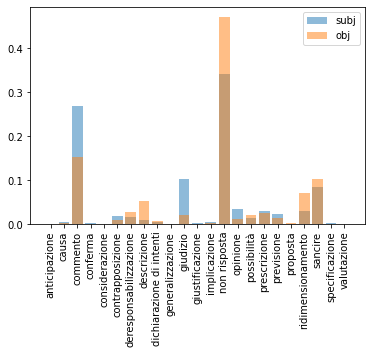

In [12]:
from matplotlib import pyplot  as plt

plt.bar(subj_dict.keys(),[e/subj_size for e in subj_dict.values()] , alpha=0.5, label='subj', align='center')
plt.bar(obj_dict.keys(),[e/obj_size for e in obj_dict.values()] , alpha=0.5, label='obj', align='center')
plt.legend(loc='upper right')
plt.xticks(rotation='vertical')
plt.show()

In [6]:
test_df = pd.read_csv('../data/raw/sentipolc/test_set_sentipolc16_gold2000.csv', escapechar='\\')
#test_df = test_df.drop(['idtwitter', 'opos', 'oneg', 'iro', 'lpos', 'lneg', 'top'], axis=1)

In [14]:
test_df

,subj,text
0,0,Tra 5 minuti presentazione piano scuola del go...
1,1,"""@matteorenzi: Alle 10 appuntamento su http://..."
2,1,#labuonascuola gli #evangelisti #digitali non ...
3,0,Riforma scuola Tutto il discorso di Renzi su ...
4,1,.@matteorenzi @MiurSocial #labuonascuola basta...
...,...,...
1995,0,Anche prodotti alimentari tipici pugliesi in v...
1996,0,intensità di vita https://t.co/jv4aARxzhz
1997,1,Oggi tutti che iniziano l'università e io sul ...
1998,1,@GliIntoccabili @nonleggerlo Ma Ferrero? il co...


In [7]:
from models.bert_segmenter import BertSegmenter

bert_seg = BertSegmenter()
test_df['spans'] = test_df['text'].map(bert_seg.predict).values.tolist()

In [8]:
from models.bert_rep import BertRep

bert_rep = BertRep()
test_df['rep'] = test_df['spans'].map(bert_rep.predict).values.tolist()

In [9]:
test_df.to_csv('../data/processed/sentipolc/subj_rep_test.csv', index = False, header=True)

In [18]:
test_df

,subj,text,spans,rep
0,0,Tra 5 minuti presentazione piano scuola del go...,[Tra 5 minuti presentazione piano scuola del g...,[non risposta]
1,1,"""@matteorenzi: Alle 10 appuntamento su http://...","[""@matteorenzi: Alle 10 appuntamento su http:/...",[non risposta]
2,1,#labuonascuola gli #evangelisti #digitali non ...,[#labuonascuola gli #evangelisti #digitali non...,"[prescrizione, ridimensionamento]"
3,0,Riforma scuola Tutto il discorso di Renzi su ...,[Riforma scuola Tutto il discorso di Renzi su...,[non risposta]
4,1,.@matteorenzi @MiurSocial #labuonascuola basta...,[.@matteorenzi @MiurSocial #labuonascuola bast...,[non risposta]
...,...,...,...,...
1995,0,Anche prodotti alimentari tipici pugliesi in v...,[Anche prodotti alimentari tipici pugliesi in ...,[descrizione]
1996,0,intensità di vita https://t.co/jv4aARxzhz,[intensità di vita https://t.co/jv4aARxzhz],[ridimensionamento]
1997,1,Oggi tutti che iniziano l'università e io sul ...,[Oggi tutti che iniziano l'università e io sul...,[descrizione]
1998,1,@GliIntoccabili @nonleggerlo Ma Ferrero? il co...,[@GliIntoccabili @nonleggerlo Ma Ferrero? il c...,[commento]
